## 01 Import used libraries

In [15]:
# required and used Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## 02 Used Functions for feature engineering

*   Get dataframes data removing unwanted labels and null data

In [16]:
from scipy.linalg import dft
def getTrainTestdata(df, required_label, removing_labels):

  # removeing null values and not required labels
  df = df.drop(removing_labels, axis =1).dropna()

  return df, df.pop(required_label)

*   Random Forest Classifier used to create the model


In [17]:
def useRandommForestModel(X_train, y_train, X_test):
  # Define model. Specify a number for random_state to ensure same results each run
  model = RandomForestClassifier(random_state=1)

  # Fit model
  model.fit(X_train, y_train)

  # predict values using model
  predict_val = model.predict(X_test)

  return predict_val

*   K-Nearest Neighbor used to create the model

In [18]:
def useKNN(X_train, y_train, X_test, n_neighbors = 5):
  # Create and train your KNN classifier model
  # You can perform hyperparameter tuning by changing the value of 'n_neighbors'
  knn = KNeighborsClassifier(n_neighbors)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

  # create KNN model
  # classifier = KNeighborsClassifier(n_neighbors=5)
  # classifier.fit(X_train, y_train)
  # y_pred = classifier.predict(X_test)
  # return y_pred

*   create a model using support vector machine using **sklearn.svm**

In [19]:
from sklearn.svm import SVC
def useSVM(X_train, y_train, X_test):
  # standardize the data set
  svc = SVC(kernel="linear")

  # create KNN model
  svc.fit(X_train, y_train)
  y_pred = svc.predict(X_test)
  return y_pred

* Get the accuracy and report of the predictions

In [20]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

def getSummary(y_test, predict_val):
    print(confusion_matrix(y_test, predict_val))
    print(f"Accuracy: {accuracy_score(y_test, predict_val)}")
    print(f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}")
    print(f"Precision: {precision_score(y_test, predict_val, average='weighted')}")
    print(f"Recall: {recall_score(y_test, predict_val, average='weighted')}")
    return [f"Accuracy: {accuracy_score(y_test, predict_val)}", f"F1 Score: {f1_score(y_test, predict_val, average='weighted')}",f"Precision: {precision_score(y_test, predict_val, average='weighted')}", f"Recall: {recall_score(y_test, predict_val, average='weighted')}"]
  # # get the mean absolute error of the model
  # MAE = mean_absolute_error(y_test, predict_val)

  # # get the accuracy of the model
  # accuracy = accuracy_score(y_test, predict_val)
  # report = classification_report(y_test, predict_val)
  # return MAE, report,accuracy

*   select best K number of features using sklearn **SelectBest** function which uses **f_regression**

In [21]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import f_regression

def getSelectedFeatures(k, X_train, y_train):
  # define number of features to keep "k"

  # perform feature selection
  X_new = SelectKBest(f_regression, k=k).fit_transform(X_train, y_train)

  # get feature names of selected features
  selected_features = X_train.columns[SelectKBest(f_regression, k=k).fit(X_train, y_train).get_support()]

  return selected_features

*   Add a ***Principal Component Analysis(PCA)*** and get additional features by finding principal components

In [22]:
from sklearn.decomposition import PCA
def apply_pca(n_Components, X_train, X_test, X_test_predict, standardize=True):
    # Standardize
    if standardize:
        X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
    # Create principal components
    pca = PCA(n_Components, svd_solver='full')
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    X_test_predict_pca = pca.transform(X_test_predict)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_train_pca.shape[1])]
    X_train_pca = pd.DataFrame(X_train_pca, columns=component_names)
    X_test_pca = pd.DataFrame(X_test_pca, columns=component_names)
    X_test_predict_pca = pd.DataFrame(X_test_predict_pca, columns=component_names)
    # Create loadings
    # loadings = pd.DataFrame(
    #     pca.components_.T,  # transpose the matrix of loadings
    #     columns=component_names,  # so the columns are the principal components
    #     index=X_train.columns,  # and the rows are the original features
    # )
    return pca, X_train_pca, X_test_pca, X_test_predict_pca

## 03 Reducing features by feature engineering of Label 01



###Get dataset and remove un wanted labels

In [9]:
train = pd.read_csv("drive/MyDrive/ML_Project/Layer_12_train.csv")
test = pd.read_csv("drive/MyDrive/ML_Project/Layer_12_valid.csv")
test_predict = pd.read_csv("drive/MyDrive/ML_Project/Layer_12_test.csv")


X_train_label1, y_train_label1= getTrainTestdata(train, "label_3",['label_1','label_2','label_4'])
X_test_label1, y_test_label1  = getTrainTestdata(test, "label_3",['label_1','label_2','label_4'])
X_test_predict_label1  = test_predict.drop('ID', axis =1).dropna()

# standardize the data set
scaler = StandardScaler()
scaler.fit(X_train_label1)

component_names = X_train_label1.columns

 # scale the data set using new scale
X_train_label1 = pd.DataFrame(scaler.transform(X_train_label1), columns=component_names)
X_test_label1 =  pd.DataFrame(scaler.transform(X_test_label1), columns=component_names)
X_test_predict_label1 = pd.DataFrame(scaler.transform(X_test_predict_label1), columns=component_names)

X_train_label1.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-0.232005,0.240404,0.181154,1.200116,-1.383716,-0.791338,-1.220296,0.772718,-1.497091,1.486435,...,-0.254721,0.907797,-1.688886,-0.673377,-1.185851,-1.634686,0.139923,-0.547595,-0.389632,0.425345
1,1.442301,2.308009,1.105057,-2.691415,0.123419,-1.087519,4.093716,-1.489215,-1.873428,1.649879,...,-2.450384,-0.275419,-0.443090,-3.145784,-1.280394,-0.291538,-0.255037,0.259953,-2.888761,2.612211
2,0.124358,0.486103,0.233100,-1.720409,1.217818,1.303207,-0.332732,-0.586454,-0.688526,2.052718,...,-1.142826,0.814596,-0.248057,-1.190837,0.010860,1.158520,-0.072343,-0.348354,-0.864262,1.760619
3,-0.066946,1.070908,0.432938,-0.557389,0.175059,1.853058,1.897984,0.843892,0.587160,1.350620,...,-0.503120,0.491180,-0.115485,-1.235240,-0.935860,0.689503,-0.132870,0.168747,-2.856067,-0.065070
4,0.276644,2.198158,0.189340,-3.384607,-1.897099,-2.948349,-1.546948,-1.764454,-3.318984,2.867851,...,-2.712055,1.343834,1.250029,-1.521161,-2.507416,-1.106653,0.762557,1.556417,-3.777959,2.092689


<Axes: >

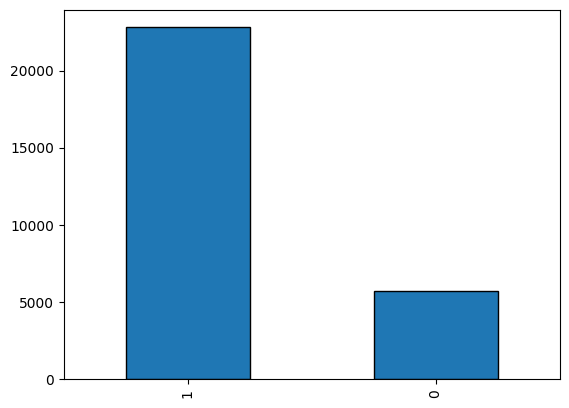

In [10]:
y_train_label1.value_counts().plot(kind='bar', edgecolor='black')

### create a model using Random KNN before feature engineering

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[ 96  46]
 [139 469]]
Accuracy: 0.7533333333333333
F1 Score: 0.773544023248325
Precision: 0.8156022860290573
Recall: 0.7533333333333333
<function classification_report at 0x7c2b43bc03a0>


### create a model using Random SVC before feature engineering

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_label1, y_train_label1, X_test_label1)
Summary = getSummary(y_test_label1, y_pred)

print(classification_report)

[[115  27]
 [154 454]]
Accuracy: 0.7586666666666667
F1 Score: 0.7818807227327466
Precision: 0.8461032287649389
Recall: 0.7586666666666667
<function classification_report at 0x7c2b43bc03a0>


### Add KNN predicted data since it has the better accuracy to csv file

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

predicted_values = dict()

Before_FE_predict_label = useKNN(X_train_label1, y_train_label1, X_test_predict_label1)
predicted_values['Predicted labels before feature engineering'] = Before_FE_predict_label

### Find best k features and select

    (before selecting features checked if k is enough to achieve a better accuracy and finally come up with k features is enough)

In [11]:
selected_features = getSelectedFeatures(300, X_train_label1, y_train_label1)

# print selected features
print(selected_features)

Index(['feature_1', 'feature_4', 'feature_5', 'feature_7', 'feature_8',
       'feature_11', 'feature_14', 'feature_17', 'feature_18', 'feature_19',
       ...
       'feature_745', 'feature_748', 'feature_749', 'feature_753',
       'feature_754', 'feature_757', 'feature_762', 'feature_763',
       'feature_764', 'feature_766'],
      dtype='object', length=300)


In [12]:
X_train_selected_label1 = X_train_label1[list(selected_features)]
X_test_selected_label1 = X_test_label1[list(selected_features)]
X_test_predict_selected_label1 = X_test_predict_label1[list(selected_features)]

### Check the accuracy of the selected features are enogh or not using KNN

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useKNN(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using KNN after redusing the features to create model: ")


[[103  39]
 [ 98 510]]
Accuracy: 0.8173333333333334
F1 Score: 0.8283862843569333
Precision: 0.8500998830981704
Recall: 0.8173333333333334
using KNN after redusing the features to create model: 


### Check the accuracy of the selected features are enogh or not using SVC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_selected_label1, y_train_label1, X_test_selected_label1)
Summary = getSummary(y_test_label1, y_pred)

print("using SVM after redusing the features to create model: ")


[[ 70  72]
 [ 76 532]]
Accuracy: 0.8026666666666666
F1 Score: 0.8037114044737806
Precision: 0.8048071607850252
Recall: 0.8026666666666666
using SVM after redusing the features to create model: 


### Create a PCA to create new features using train data

In [13]:
pca, X_train_pca, X_test_pca, X_test_predict_pca = apply_pca(0.99, X_train_label1, X_test_label1, X_test_predict_label1)
print(X_test_pca.keys())
# print(loadings.to_string())

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       ...
       'PC377', 'PC378', 'PC379', 'PC380', 'PC381', 'PC382', 'PC383', 'PC384',
       'PC385', 'PC386'],
      dtype='object', length=386)


### Find the status of the model using KNN after adding PCAs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = useKNN(X_train_pca, y_train_label1, X_test_pca, 5)
Summary = getSummary(y_test_label1, y_pred)

print("Mean absolute error after adding new pca features of the model Lable_1: ")


[[101  41]
 [138 470]]
Accuracy: 0.7613333333333333
F1 Score: 0.7813704305728542
Precision: 0.8256341191144883
Recall: 0.7613333333333333
Mean absolute error after adding new pca features of the model Lable_1: 


### Find the status of the model using SVC after adding PCAs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = useSVM(X_train_pca, y_train_label1, X_test_pca)
Summary = getSummary(y_test_label1, y_pred)

[[ 42 100]
 [ 21 587]]
Accuracy: 0.8386666666666667
F1 Score: 0.8125014659258561
Precision: 0.8188879184861717
Recall: 0.8386666666666667


## hyper parameter tuning

*  Hyper parameter Tuning for KNN model

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)
# fit the model on our train set
g_res = gs.fit(X_train_pca, y_train_label1)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
g_res.best_score_

0.9058201680310373

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

*  Hyper parameter Tuning for KNN model

In [14]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance',algorithm = 'brute',metric = 'manhattan')
knn.fit(X_train_pca, y_train_label1)


KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=9,
                     weights='distance')

In [15]:
# get a prediction
y_hat = knn.predict(X_test_pca)

In [17]:
print('Training set accuracy: ')
getSummary(y_test_label1, y_hat)

Training set accuracy: 
[[ 93  49]
 [118 490]]
Accuracy: 0.7773333333333333
F1 Score: 0.7923979013281766
Precision: 0.8204199339365217
Recall: 0.7773333333333333


['Accuracy: 0.7773333333333333',
 'F1 Score: 0.7923979013281766',
 'Precision: 0.8204199339365217',
 'Recall: 0.7773333333333333']

### Hyper parameter Tuning

*  Hyper parameter Tuning for SVM model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
param_dist = {
    'C': [0.1, 10, 15],
    'gamma': [0.001, 0.05, 0.1, 0.5, 1],
    'kernel': ['linear'],
    'degree': [1, 2]
}
svc_tuning = SVC(class_weight="balanced")
random_search = rscv(
    svc_tuning,
    param_distributions=param_dist)
random_search.fit(X_train_pca, y_train_label1)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': [0.1, 10, 15], 'degree': [1, 2],
                                        'gamma': [0.001, 0.05, 0.1, 0.5, 1],
                                        'kernel': ['linear']})

In [ ]:
print(random_search.best_params_)
print(random_search.best_estimator_.get_params())

{'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'C': 0.1}
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
predict = random_search.predict(X_test_pca)
accuracy_score(y_test_label1, predict)

0.8253333333333334

In [18]:
svc = SVC(class_weight="balanced", kernel= 'linear', gamma= 0.1, degree= 2, C= 0.1)

# create KNN model
svc.fit(X_train_pca, y_train_label1)
y_pred = svc.predict(X_test_pca)
summary = getSummary(y_test_label1, y_pred)

[[ 32 110]
 [ 21 587]]
Accuracy: 0.8253333333333334
F1 Score: 0.7914295706847431
Precision: 0.797042346805266
Recall: 0.8253333333333334


*  Hyper parameter Tuning for Logistic Reggression classifier model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

logModel = LogisticRegression()
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = RandomizedSearchCV(logModel, param_distributions = param_grid, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train_pca, y_train_label1)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 64, in _check_solver
    raise ValueError(
ValueError: Only '

In [21]:
predict2 = clf.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.8613333333333333

In [24]:
logModel1 = LogisticRegression(C= 0.08858667904100823, class_weight= 'balanced', dual= False, fit_intercept= 1, intercept_scaling= 1, l1_ratio= None, max_iter= 5000, multi_class= 'auto', n_jobs= None, penalty= 'l2', random_state= None, solver= 'sag', tol= 0.0001, verbose= 0, warm_start= False)
logModel1.fit(X_train_pca, y_train_label1)
predict3 = logModel1.predict(X_test_pca)
accuracy_score(y_test_label1, predict3)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


0.86

In [23]:
print(clf.best_estimator_.get_params())
# {'C': 11.288378916846883, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'none', 'random_state': None, 'solver': 'saga', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

{'C': 0.08858667904100823, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 5000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'sag', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


*  Hyper parameter Tuning for SVM modl

In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh2 = SVC(class_weight="balanced")
param_dist1 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search2 = rscv(
    svc_tuninh2,
    param_distributions=param_dist1,
    n_iter=2, cv=5, n_jobs=-1, verbose=1,
    )
random_search2.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=1)

In [ ]:
predict2 = random_search2.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.8106666666666666

In [ ]:
print(random_search2.best_estimator_.get_params())

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV as rscv
svc_tuninh3 = SVC()
param_dist2 = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear']
}
random_search3 = rscv(
    svc_tuninh3,
    param_distributions=param_dist2,
    n_iter=2, cv=5, n_jobs=-1, verbose=1,
    )
random_search3.fit(X_train_pca, y_train_label1)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=2, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf', 'linear']},
                   verbose=1)

In [ ]:
predict2 = random_search3.predict(X_test_pca)
accuracy_score(y_test_label1, predict2)

0.84

In [ ]:
print(random_search2.best_estimator_.get_params())

{'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


## Get best prediction

In [24]:
from sklearn.linear_model import LogisticRegression


best_model = LogisticRegression(C= 0.08858667904100823, class_weight= 'balanced', dual= False, fit_intercept= 1, intercept_scaling= 1, l1_ratio= None, max_iter= 5000, multi_class= 'auto', n_jobs= None, penalty= 'l2', random_state= None, solver= 'sag', tol= 0.0001, verbose= 0, warm_start= False)
best_model.fit(X_train_pca, y_train_label1)
predict3 = best_model.predict(X_test_pca)
accuracy_score(y_test_label1, predict3)

y_pred_test = best_model.predict(X_test_predict_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [25]:
accuracy_score(y_test_label1, predict3)

0.86

In [26]:
# Create DataFrame
df = pd.DataFrame(y_pred_test, columns =["label_3"] )
df.head()
df.to_csv("drive/MyDrive/ML_Project/Project_Layer_12_Label_3", index=False)